# MMAI 2025 869: Team Project Template
*Updated May 3, 2024*

This notebook serves as a template for the Team Project. Teams can use this notebook as a starting point, and update it successively with new ideas and techniques to improve their model results.

Note that is not required to use this template. Teams may also alter this template in any way they see fit.


# Preliminaries: Inspect and Set up environment

No action is required on your part in this section. These cells print out helpful information about the environment, just in case.

In [105]:
import datetime
import pandas as pd
import numpy as np

In [106]:
print(datetime.datetime.now())

2024-05-24 15:54:36.435911


In [107]:
!which python

/Users/mhoy/.pyenv/versions/3.11.8/bin/python


In [108]:
!python --version

Python 3.11.8


In [109]:
!echo $PYTHONPATH

In [110]:
# if you need to install any package, do so here. For example:
! pip install --user pandas
! pip install --user numpy
! pip install --user scikit-learn
! pip install --user xgboost
! pip install --user seaborn
! pip install --user matplotlib
! pip install --user fancyimpute
! pip install --user category_encoders
! pip install --user catboost
! pip install --user optuna


# 0. Data Loading and Inspection

## 0.1: Load data

The file containing the labeled training data is conveniently located on the cloud at the address below. Let's load it up and take a look.

In [111]:
df = pd.read_csv("https://drive.google.com/uc?export=download&id=1eYCKuqJda4bpzXBVnqXylg0qQwvpUuum")

## 0.1 Simple Exploratory Data Analysis

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21365 entries, 0 to 21364
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 21292 non-null  float64
 1   h1n1_knowledge               21274 non-null  float64
 2   behavioral_antiviral_meds    21306 non-null  float64
 3   behavioral_avoidance         21202 non-null  float64
 4   behavioral_face_mask         21351 non-null  float64
 5   behavioral_wash_hands        21329 non-null  float64
 6   behavioral_large_gatherings  21293 non-null  float64
 7   behavioral_outside_home      21306 non-null  float64
 8   behavioral_touch_face        21263 non-null  float64
 9   doctor_recc_h1n1             19629 non-null  float64
 10  doctor_recc_seasonal         19629 non-null  float64
 11  chronic_med_condition        20594 non-null  float64
 12  child_under_6_months         20710 non-null  float64
 13  health_worker   

In [113]:
# Let's print some descriptive statistics for all the numeric features.

df.describe().T

,count,mean,std,min,25%,50%,75%,max
h1n1_concern,21292.0,1.618026,0.909311,0.0,1.0,2.0,2.0,3.0
h1n1_knowledge,21274.0,1.265018,0.617816,0.0,1.0,1.0,2.0,2.0
behavioral_antiviral_meds,21306.0,0.049329,0.216559,0.0,0.0,0.0,0.0,1.0
behavioral_avoidance,21202.0,0.724507,0.446773,0.0,0.0,1.0,1.0,1.0
behavioral_face_mask,21351.0,0.070348,0.255739,0.0,0.0,0.0,0.0,1.0
behavioral_wash_hands,21329.0,0.823574,0.381192,0.0,1.0,1.0,1.0,1.0
behavioral_large_gatherings,21293.0,0.357864,0.479383,0.0,0.0,0.0,1.0,1.0
behavioral_outside_home,21306.0,0.337464,0.472856,0.0,0.0,0.0,1.0,1.0
behavioral_touch_face,21263.0,0.675728,0.468113,0.0,0.0,1.0,1.0,1.0
doctor_recc_h1n1,19629.0,0.221662,0.415375,0.0,0.0,0.0,0.0,1.0


In [114]:
# What is the number of unique values in all the categorical features? And what is
# the value with the highest frequency?

df.describe(include=object).T

,count,unique,top,freq
age_group,21365,5,65+ Years,5454
education,20240,4,College Graduate,8063
race,21365,4,White,16974
sex,21365,2,Female,12748
income_poverty,17851,3,"<= $75,000, Above Poverty",10301
marital_status,20245,2,Married,10880
rent_or_own,19737,2,Own,15012
employment_status,20203,3,Employed,10886
hhs_geo_region,21365,10,lzgpxyit,3406
census_msa,21365,3,"MSA, Not Principle City",9268


In [115]:
# How much missing data is in each feature?

df.isna().sum()

h1n1_concern                      73
h1n1_knowledge                    91
behavioral_antiviral_meds         59
behavioral_avoidance             163
behavioral_face_mask              14
behavioral_wash_hands             36
behavioral_large_gatherings       72
behavioral_outside_home           59
behavioral_touch_face            102
doctor_recc_h1n1                1736
doctor_recc_seasonal            1736
chronic_med_condition            771
child_under_6_months             655
health_worker                    643
health_insurance                9858
opinion_h1n1_vacc_effective      318
opinion_h1n1_risk                311
opinion_h1n1_sick_from_vacc      321
opinion_seas_vacc_effective      371
opinion_seas_risk                410
opinion_seas_sick_from_vacc      431
age_group                          0
education                       1125
race                               0
sex                                0
income_poverty                  3514
marital_status                  1120
r

In [116]:
# For convienience, let's save the names of all numeric features to a list,
# and the names of all categorical features to another list.
target_feature = 'h1n1_vaccine'

numeric_features = [
          "h1n1_concern",
          "h1n1_knowledge",
          "behavioral_antiviral_meds",
          "behavioral_avoidance",
          "behavioral_face_mask",
          "behavioral_wash_hands",
          "behavioral_large_gatherings",
          "behavioral_outside_home",
          "behavioral_touch_face",
          "doctor_recc_h1n1",
          "doctor_recc_seasonal",
          "chronic_med_condition",
          "child_under_6_months",
          "health_worker",
          "health_insurance",
          "opinion_h1n1_vacc_effective",
          "opinion_h1n1_risk",
          "opinion_h1n1_sick_from_vacc",
          "opinion_seas_vacc_effective",
          "opinion_seas_risk",
          "opinion_seas_sick_from_vacc",
          "household_adults",
          "household_children",
]

categorical_features = [
    "age_group",
    "education",
    "race",
    "sex",
    "income_poverty",
    "marital_status",
    "rent_or_own",
    "employment_status",
    "hhs_geo_region",
    "census_msa",
    "employment_industry",
    "employment_occupation",
]

all_cat_features = categorical_features

# these are based on correlation observations
cat_cols_to_drop = [
    "census_msa",
    "sex",
    "hhs_geo_region",
    #'employment_industry',
    #'employment_occupation'
]

cols_to_drop = cat_cols_to_drop + [
    "household_adults",
    "household_children",
    "behavioral_large_gatherings",
    "behavioral_outside_home",
]

categorical_features = [x for x in categorical_features if x not in cat_cols_to_drop]

large_na_features = [
    'employment_industry',
    'employment_occupation',
    'health_insurance'
]


In [117]:
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder

No vaccine: 16821
Has vaccine: 4544
training_data_pos_scale_weight: 3.7018045774647885


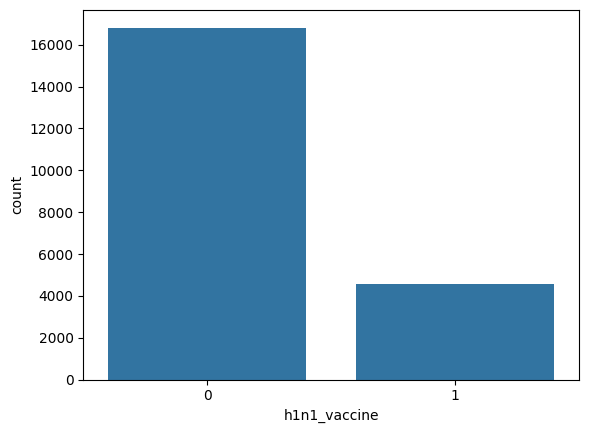

In [118]:
# figure out how imbalanced this is...
target_df = pd.DataFrame(df[target_feature])

no_vaccine_count = len(df[df[target_feature]==0])
yes_vaccine_count = len(df[df[target_feature]==1])
print(f"No vaccine: {no_vaccine_count}")
print(f"Has vaccine: {yes_vaccine_count}")
sns.countplot(x=target_feature, data=target_df)

training_data_pos_scale_weight = (no_vaccine_count / yes_vaccine_count)
print(f"training_data_pos_scale_weight: {training_data_pos_scale_weight}")

# 1. Train/Test Split

Now we randomly split the available data into train and test subsets.

The training data will later be used to build and assess the model on various combinations of hyperparaters.

The testing data will be used as a "final estimate" of a model's performance.

# 2. Model 1 (A simple DecisionTree model)

As a baseline, we'll do the absolute bare minimum data cleaning and then quickly build a simple Decision Tree.

In [119]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import TargetEncoder
from sklearn.model_selection import cross_validate
from sklearn.metrics import classification_report, roc_auc_score

In [120]:
# Scikit-learn needs us to put the features in one dataframe, and the label in another.
# It's tradition to name these variables X and y, but it doesn't really matter.

X = df.drop('h1n1_vaccine', axis=1)
y = df['h1n1_vaccine']

## 1.1 Cleaning and FE

In [121]:
labeled_columns = []

def drop_columns(data):
    return data.drop(cols_to_drop, axis=1, errors='ignore')

## TODO - add mising indicator columns for features with large amounts of missing data...
def add_missing_val_indicators(data):
    for feature in large_na_features:
        if not feature in data.columns:
            continue
        new_feature_name = f"{feature}_has_imp"
        data[new_feature_name] = np.where(data[feature].isna(), 1, 0)
    return data

# def impute_data(data):
#     imp = SimpleImputer()
#     # imp = KNNImputer()
#     imp.fit(data)
#     return pd.DataFrame(imp.transform(data), columns=data.columns)

def better_imputation(data):
    from fancyimpute import KNN, NuclearNormMinimization, SoftImpute, BiScaler
    #return pd.DataFrame(KNN(k=2).fit_transform(data), columns=data.columns)
    # WAY TOO LONG -- return pd.DataFrame(NuclearNormMinimization().fit_transform(data), columns=data.columns)
    return pd.DataFrame(SoftImpute(verbose=False).fit_transform(data), columns=data.columns)

label_mapping = {}

def apply_label_mapping_fxn(row):
    global label_mapping
    for feature in all_cat_features:
        feature_mapping = label_mapping[feature]
        enc_value = feature_mapping[row[feature]]
        row[feature] = enc_value
    return row

def apply_label_mapping(data):
    return data.apply(apply_label_mapping_fxn, axis=1)

def update_row_mappings(row):
    global label_mapping
    for feature in all_cat_features:
        if not feature in label_mapping:
            label_mapping[feature] = {}
        enc_feature_name = f"{feature}_enc"
        orig_value = row[feature]
        enc_value = row[enc_feature_name]
        label_mapping[feature][orig_value] = enc_value

    return row

def set_label_mapping(orig_data, encoded_data):
    global label_mapping
    map_df = pd.DataFrame()
    for feature in all_cat_features:
        map_df[feature] = orig_data[feature]
        map_df[f"{feature}_enc"] = encoded_data[feature]
    map_df.apply(update_row_mappings, axis=1)

def label_encoding(data):
    global labeled_columns

    import category_encoders as ce
    encoder = ce.JamesSteinEncoder(cols=all_cat_features)
    labeled = encoder.fit_transform(data, y)
    labeled_columns = list(encoder.get_feature_names_out())

    set_label_mapping(data, labeled)

    return labeled

def one_hot_encode_categories(df):
    return pd.get_dummies(df, columns = categorical_features)

def feature_engineering(data):
    # from kaggle
    data['good_knowledge'] = np.where(data['h1n1_knowledge'] == 2,1,0)    
    data['concern_knowledge'] = data['h1n1_concern']+data['h1n1_knowledge']

    data['insured_family_size'] = data['household_adults'] + data['household_children'] + data['health_insurance']
    data['at_risk_patient'] = data['doctor_recc_h1n1'] + data['doctor_recc_seasonal'] + data['chronic_med_condition']

    behavioural_features = []
    for c in data.columns:
        if 'behavioral' in c:
            behavioural_features.append(c)
    data['behavioral_risk'] = data[behavioural_features].sum(axis=1)

    data['opinion_seas_risk'] = data['opinion_seas_risk'] + data['opinion_seas_sick_from_vacc']
    data['opinion_h1n1'] = data['opinion_h1n1_vacc_effective'] + data['h1n1_concern']
    data['poverty_vs_insurance'] = data['income_poverty'] + data['health_insurance']

    high_correlated_items = [
        'income_poverty', 
        'marital_status',
        'rent_or_own', 
        'employment_status'
    ]
    data['inc_mar_rent_empl'] = data[high_correlated_items].mean(axis=1)
    data.drop(high_correlated_items, axis=1, errors='ignore')
    
    opinion_features = [
        'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
        'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
        'opinion_seas_risk', 'opinion_seas_sick_from_vacc'        
    ]
    data['opinions'] = data[opinion_features].mean(axis=1)
    data.drop(opinion_features, axis=1, errors='ignore')

    behavioural_features = [
        'behavioral_antiviral_meds', 'behavioral_avoidance',
        'behavioral_face_mask', 'behavioral_wash_hands',
        'behavioral_touch_face'        
    ]
    data['behaviours'] = data[behavioural_features].mean(axis=1)
    data.drop(behavioural_features, axis=1, errors='ignore')

    return data

def normalize_dataframe(df):
    # use a lambda function because sklearn normalize cannot handle NaN values
    return df.apply(lambda iterator: ((iterator.max() - iterator)/(iterator.max() - iterator.min())))

def clean_data(data, use_labels = False):
    ret = data

    if use_labels:
        ret = apply_label_mapping(ret)
    else:
        ret = label_encoding(ret)

    ret = feature_engineering(ret)

    ret = drop_columns(ret)

    ret = add_missing_val_indicators(ret)

    ret = better_imputation(ret)

    return ret

cleaned_data = clean_data(X)


In [122]:
# TODO: Add more data cleaning, as desired.

## 1.2 Model Creation, Hyperparameter Tuning, and Validation

In [131]:
# do some testing...
DO_RUN_TUNING = True

import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

test_model = xgb.XGBClassifier(random_state=1).fit(cleaned_data.to_numpy(), y.to_numpy())

grid_search_params = {
    'objective': ['binary:logitraw'],
    # 'min_child_weight': [0.44897959183673464],
    # 'gamma': [0.048275862068965524],
    #"learning_rate": list(np.linspace(0.01, 0.3, num=20)), # [0.3], 
    # "max_depth": list(range(3, 10)),
    # "tree_method": ["hist"],
    # 'num_parallel_tree': [17],
    # min_samples_leaf
    'max_bin': list(range(120, 400, 20)),
    'lambda': list(np.linspace(0, 2, num=50)),
    'alpha': list(np.linspace(0, 2, num=50)),
    # "subsample": list(np.linspace(0.3, 1.0, num=20)),
    "scale_pos_weight": [training_data_pos_scale_weight], #list(np.linspace(3.5, 3.9, num=100)), #[3.65], #list(np.linspace(3.0, 4.0, num=50)) #
    #"n_estimators": list(range(80, 120, 10)), # [102],
    #"gamma": list(np.linspace(0.0, 0.2, num=20)), # [0.0],
    #"eval_metric": ['rmse'],
    # 'min_child_weight': [1.1020408163265305],
    #"min_child_weight": list(np.linspace(0.0, 2.0, num=20)), # [1.0],
    #"sampling_method": ['uniform'],
    #"max_delta_step": [1.0],
    #"colsample_bytree": list(np.linspace(0.3, 0.9, num=20)),
    #"colsample_bylevel": list(np.linspace(0.3, 0.9, num=20)),
    #"colsample_bynode": list(np.linspace(0.3, 0.9, num=20)),
}

if DO_RUN_TUNING:
    grid_search = RandomizedSearchCV(test_model, grid_search_params, cv=5, n_jobs=-1, scoring="f1_macro")
    grid_search.fit(cleaned_data, y)
    display(grid_search.best_score_)
    best_params = grid_search.best_params_
    display(grid_search.best_params_)

    test_model = xgb.XGBClassifier(random_state=1, **best_params).fit(cleaned_data.to_numpy(), y.to_numpy())
    predicted = test_model.predict(cleaned_data)

    cv_results = cross_validate(test_model, cleaned_data, y, cv=5, scoring="f1_macro")
    f1_score = np.mean(cv_results['test_score'])
    display(f"results f1: {f1_score}")

    print(classification_report(y, predicted))
    print(f"auc: {roc_auc_score(y, predicted)}")

0.7562974458302334

{'scale_pos_weight': 3.7018045774647885,
 'objective': 'binary:logitraw',
 'max_bin': 360,
 'lambda': 1.183673469387755,
 'alpha': 0.2040816326530612}

'results f1: 0.7562974458302334'

              precision    recall  f1-score   support

           0       0.96      0.95      0.96     16821
           1       0.81      0.87      0.84      4544

    accuracy                           0.93     21365
   macro avg       0.89      0.91      0.90     21365
weighted avg       0.93      0.93      0.93     21365

auc: 0.9074258087538967


In [124]:
current_best_xgb = {
    'scale_pos_weight': 3.6777777777777776,
    'objective': 'binary:logitraw',
    'min_child_weight': 0.44897959183673464,
    'gamma': 0.048275862068965524,
    'num_parallel_tree': 17,
    #'lambda': 1.3061224489795917,
    #'alpha': 0.631578947368421
}

def get_clf(data, truth):
    return xgb.XGBClassifier(random_state=1, **current_best_xgb).fit(data, truth)    

In [125]:

clf = get_clf(cleaned_data, y)
predicted = clf.predict(cleaned_data)

cv_results = cross_validate(clf, cleaned_data, y, cv=5, scoring="f1_macro")
f1_score = np.mean(cv_results['test_score'])
display(f"results f1: {f1_score}")

print(classification_report(y, predicted))
print(f"auc: {roc_auc_score(y, predicted)}")

'results f1: 0.7527019821312553'

              precision    recall  f1-score   support

           0       0.96      0.95      0.96     16821
           1       0.82      0.86      0.84      4544

    accuracy                           0.93     21365
   macro avg       0.89      0.91      0.90     21365
weighted avg       0.93      0.93      0.93     21365

auc: 0.9059890842139814


## 1.4: Create Predictions for Competition Data

Once we are happy with the estimated performance of our model, we can move on to the final step.

First, we train our model one last time, using all available training data (unlike CV, which always uses a subset). This final training will give our model the best chance as the highest performance.

Then, we must load in the (unlabeled) competition data from the cloud and use our model to generate predictions for each instance in that data. We will then output those predictions to a CSV file. We will then send that file to Steve, and he can then tell us how well we did (because he knows the right answers!).

In [126]:
# Our model's "final form"

clf = get_clf(cleaned_data, y)
clf = clf.fit(cleaned_data, y)

In [127]:
X_comp = pd.read_csv("https://drive.google.com/uc?export=download&id=1SmFBoNh7segI1Ky92mfeIe6TpscclMwQ")

# Importantly, we need to perform the same cleaning/transformation steps
# on this competition data as you did the training data. Otherwise, we will
# get an error and/or unexpected results.
X_comp = clean_data(X_comp, use_labels=True)

# Use your model to make predictions
pred_comp = clf.predict(X_comp)

my_submission = pd.DataFrame({'predicted': pred_comp})

# Let's take a peak at the results (as a sanity check)
display(my_submission.head(10))

# You could use any filename.
my_submission.to_csv('my_submission.csv', index=False)

# You can now download the above file from Colab (see menu on the left)

,predicted
0,0
1,0
2,0
3,1
4,0
5,0
6,0
7,0
8,0
9,1


# Model 2 (Your idea Here!)

Here, you can do all the above, but try different ideas:

- Different ML algorithms (e.g., RandomForestClassifier, LGBM, NN)
- Different data cleaning steps (Ordinal encoding, One Hot Encoding, etc.)
- Hyperparameter tuning (using, e.g., GridSearchCV or RandomizedSearchCV)
- Ensembles
- .... anything you can think of!


Steve's GitHub page is a great place for ideas:

https://github.com/stepthom/869_course

In [128]:
# TODO: Win the competition here!

# Model 3 (Your next idea here!)

In [129]:
# TODO: Win the competition here, too!